In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
df = pd.read_csv('Divvy_Trips_2019_Q2.csv')
df.columns
df2 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [3]:
df.rename(columns={ df.columns[0]:df2.columns[0],df.columns[1]:df2.columns[1],df.columns[2]:df2.columns[2],df.columns[3]:df2.columns[3],df.columns[4]:df2.columns[4],
          df.columns[5]:df2.columns[5],df.columns[6]:df2.columns[6],df.columns[7]:df2.columns[7],df.columns[8]:df2.columns[8],df.columns[9]:df2.columns[9],
          df.columns[10]:df2.columns[10],df.columns[11]:df2.columns[11] }, inplace=True)
df.to_csv("Divvy_Trips_2019_Q2.csv", index=False)

# Checking the Dataset and Exploring its Columns and Datatypes

In [4]:
df = pd.concat(map(pd.read_csv, ['Divvy_Trips_2019_Q1.csv', 'Divvy_Trips_2019_Q2.csv', 'Divvy_Trips_2019_Q3.csv','Divvy_Trips_2019_Q4.csv']), ignore_index=True) 
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [5]:
df.index

RangeIndex(start=0, stop=3818004, step=1)

In [6]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 349.5+ MB


In [8]:
df.describe(include='object')

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender
count,3818004,3818004,3818004,3818004,3818004,3818004,3258798
unique,3306090,3238342,21542,640,641,2,2
top,2019-06-14 18:03:21,2019-04-17 17:35:12,352.0,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Subscriber,Male
freq,8,20,4016,67983,81723,2937367,2400820


In [9]:
df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               559206
birthyear            538751
dtype: int64

In [10]:
df.nunique()

trip_id              3818004
start_time           3306090
end_time             3238342
bikeid                  6017
tripduration           21542
from_station_id          616
from_station_name        640
to_station_id            617
to_station_name          641
usertype                   2
gender                     2
birthyear                 94
dtype: int64

### Checking Trip_ID

In [11]:
len(str(df.iloc[1]["trip_id"]))

8

In [12]:
def check_column_for_8_digit_integers(df, column_name):
    # Checks if all entries in a DataFrame column are 8-digit integers.
    series = df[column_name].dropna()
    series_as_str = series.astype(str)
    all_numeric = series_as_str.str.isnumeric().all()
    all_eight_digits = (series_as_str.str.len() == 8).all()

    return all_numeric and all_eight_digits

is_valid = check_column_for_8_digit_integers(df, 'trip_id')
print(is_valid)

True


### Checking Start time and End time

In [13]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [14]:
sd = pd.to_datetime(df['start_time'])
ed = pd.to_datetime(df['end_time'])

#### Checking if ending time is earlier than starting time. If so, we swap the times

In [15]:
df['is_end_time_greater'] = df.apply(lambda x: x['end_time'] > x['start_time'], axis=1) 

In [16]:
df['is_end_time_greater'].unique()

array([ True, False])

In [17]:
df[df["is_end_time_greater"] == False]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,is_end_time_greater
3498428,25625830,2019-11-03 01:43:21,2019-11-03 01:09:56,4141,"1,594.0",632,Clark St & Newport St,133,Kingsbury St & Kinzie St,Customer,Male,1995.0,False
3498433,25625836,2019-11-03 01:46:01,2019-11-03 01:10:44,6329,"1,483.0",373,Kedzie Ave & Chicago Ave,498,California Ave & Fletcher St,Customer,NaN,NaN,False
3498435,25625838,2019-11-03 01:47:49,2019-11-03 01:02:40,964,891.0,229,Southport Ave & Roscoe St,87,Racine Ave & Fullerton Ave,Subscriber,Female,1987.0,False
3498436,25625839,2019-11-03 01:48:04,2019-11-03 01:16:48,2214,"1,724.0",131,Lincoln Ave & Belmont Ave,131,Lincoln Ave & Belmont Ave,Subscriber,Male,1996.0,False
3498437,25625841,2019-11-03 01:50:31,2019-11-03 01:04:25,4179,834.0,298,Lincoln Ave & Belle Plaine Ave,258,Logan Blvd & Elston Ave,Subscriber,Male,1975.0,False
3498439,25625843,2019-11-03 01:51:59,2019-11-03 01:03:02,2920,663.0,460,Clark St & Bryn Mawr Ave,238,Wolcott (Ravenswood) Ave & Montrose Ave,Subscriber,Male,1992.0,False
3498440,25625844,2019-11-03 01:51:55,2019-11-03 01:04:33,3338,757.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,False
3498441,25625845,2019-11-03 01:53:08,2019-11-03 01:04:53,2142,705.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,False
3498442,25625846,2019-11-03 01:53:10,2019-11-03 01:04:53,5877,703.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,False
3498443,25625847,2019-11-03 01:53:24,2019-11-03 01:06:08,3984,764.0,484,Monticello Ave & Irving Park Rd,484,Monticello Ave & Irving Park Rd,Customer,NaN,NaN,False


In [18]:
mask = df['is_end_time_greater'] == False
df.loc[mask, ['start_time', 'end_time']] = df.loc[mask, ['end_time', 'start_time']].values

In [19]:
df[['starting_date', 'starting_time']] = df["start_time"].str.split(' ',expand=True)
df[['ending_date', 'ending_time']] = df["end_time"].str.split(' ',expand=True)

In [20]:
df.drop(['start_time'],axis=1,inplace=True)
df.drop(['end_time'],axis=1,inplace=True)
df.drop(['is_end_time_greater'],axis=1,inplace=True)

### Making a Month Field

In [21]:
df['starting_date']

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
3817999    2019-12-31
3818000    2019-12-31
3818001    2019-12-31
3818002    2019-12-31
3818003    2019-12-31
Name: starting_date, Length: 3818004, dtype: object

In [22]:
df['starting_date'] = pd.to_datetime(df['starting_date'])
df['ending_date'] = pd.to_datetime(df['ending_date'])
df['start_month'] = df['starting_date'].dt.month_name()
df['end_month'] = df['ending_date'].dt.month_name()

In [23]:
df.head()

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
0,21742443,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,2019-01-01,00:04:37,2019-01-01,00:11:07,January,January
1,21742444,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,2019-01-01,00:08:13,2019-01-01,00:15:34,January,January
2,21742445,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,2019-01-01,00:13:23,2019-01-01,00:27:12,January,January
3,21742446,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,2019-01-01,00:13:45,2019-01-01,00:43:28,January,January
4,21742447,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,2019-01-01,00:14:52,2019-01-01,00:20:56,January,January


### Checking Bike_ID

In [24]:
df['bikeid'].value_counts()

bikeid
3088    1229
3898    1206
3250    1205
5306    1186
6453    1176
        ... 
8          1
2231       1
5588       1
6620       1
1741       1
Name: count, Length: 6017, dtype: int64

### Checking Trip Duration

In [25]:
df['tripduration'] = df.apply(lambda x: float(str(x['tripduration']).replace(",",'')), axis=1)
df['is_duration_positive'] = df.apply(lambda x: x['tripduration'] > 0, axis=1)

In [26]:
df['is_duration_positive'].unique()

array([ True])

In [27]:
df['tripduration'].describe()

count    3.818004e+06
mean     1.450203e+03
std      2.985414e+04
min      6.100000e+01
25%      4.110000e+02
50%      7.090000e+02
75%      1.283000e+03
max      1.062840e+07
Name: tripduration, dtype: float64

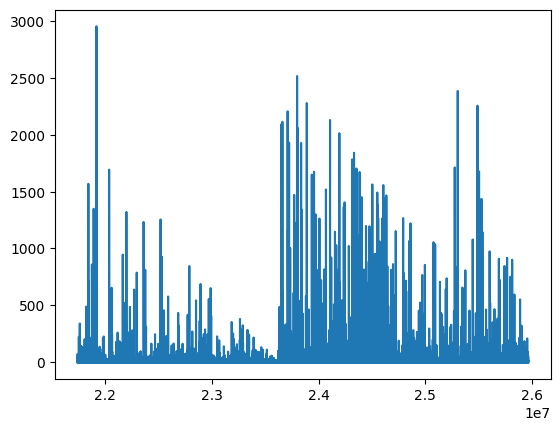

In [28]:
plt.plot(df['trip_id'],(df['tripduration']//3600))

In [29]:
df.sort_values(by='tripduration',ascending=False)[:5]

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month,is_duration_positive
148897,21920842,3846,10628400.0,213,Leavitt St & North Ave,360,DIVVY Map Frame B/C Station,Customer,NaN,NaN,2019-02-14,14:44:13,2019-06-17,16:04:35,February,June,True
1753537,23798837,1229,9056633.0,418,Ellis Ave & 53rd St,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Subscriber,Male,1999.0,2019-07-16,18:17:58,2019-10-29,14:01:52,July,October,True
3189137,25302386,6232,8585902.0,435,Kedzie Ave & Roosevelt Rd,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Customer,NaN,NaN,2019-10-06,13:57:02,2020-01-13,21:55:24,October,January,True
1839638,23889502,773,8203637.0,451,Sheridan Rd & Loyola Ave,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Subscriber,Female,1999.0,2019-07-22,12:09:36,2019-10-25,10:56:54,July,October,True
3367117,25487192,1083,8120385.0,529,Cicero Ave & Lake St,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Customer,NaN,NaN,2019-10-19,15:14:50,2020-01-21,13:54:35,October,January,True


In [30]:
df.sort_values(by='tripduration')[:5]

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month,is_duration_positive
3416943,25539306,6058,61.0,253,Winthrop Ave & Lawrence Ave,323,Sheridan Rd & Lawrence Ave,Subscriber,Male,1985.0,2019-10-23,18:12:21,2019-10-23,18:13:22,October,October,True
2567923,24655277,161,61.0,110,Dearborn St & Erie St,110,Dearborn St & Erie St,Customer,Male,1994.0,2019-08-29,08:06:18,2019-08-29,08:07:20,August,August,True
360235,22172619,961,61.0,100,Orleans St & Merchandise Mart Plaza,636,Orleans St & Hubbard St (*),Subscriber,Male,1988.0,2019-03-30,13:23:41,2019-03-30,13:24:42,March,March,True
884234,22790789,5123,61.0,38,Clark St & Lake St,38,Clark St & Lake St,Subscriber,Female,1993.0,2019-05-23,18:11:25,2019-05-23,18:12:26,May,May,True
1215031,23175735,644,61.0,501,Richmond St & Diversey Ave,501,Richmond St & Diversey Ave,Subscriber,Female,1989.0,2019-06-14,17:48:23,2019-06-14,17:49:24,June,June,True


In [31]:
df.drop(['is_duration_positive'],axis=1,inplace=True)

#### Dropping Rows in the dataset having trip duration less than 1 minute

In [32]:
df = df[df["tripduration"] > 60.0]

### Fixing Gender Attribute such that we are replacing missing values with N/A

In [33]:
df["gender"].isnull().sum()

np.int64(559206)

In [34]:
df["gender"] = df["gender"].fillna('N/A',axis=0)
df["gender"].isnull().sum()


np.int64(0)

In [35]:
df[df["gender"] == 'N/A']

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
19,21742463,3914,2333.0,35,Streeter Dr & Grand Ave,39,Wabash Ave & Adams St,Customer,N/A,NaN,2019-01-01,00:29:19,2019-01-01,01:08:12,January,January
21,21742465,3355,2301.0,35,Streeter Dr & Grand Ave,39,Wabash Ave & Adams St,Customer,N/A,NaN,2019-01-01,00:29:28,2019-01-01,01:07:49,January,January
48,21742494,2517,1300.0,290,Kedzie Ave & Palmer Ct,476,Kedzie Ave & Leland Ave,Customer,N/A,NaN,2019-01-01,01:10:48,2019-01-01,01:32:28,January,January
52,21742498,374,967.0,367,Racine Ave & 35th St,9,Leavitt St & Archer Ave,Customer,N/A,NaN,2019-01-01,01:17:23,2019-01-01,01:33:30,January,January
53,21742499,1776,978.0,367,Racine Ave & 35th St,9,Leavitt St & Archer Ave,Customer,N/A,NaN,2019-01-01,01:17:33,2019-01-01,01:33:51,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817964,25962862,5474,973.0,146,Loomis St & Jackson Blvd,382,Western Ave & Congress Pkwy,Subscriber,N/A,1999.0,2019-12-31,23:21:40,2019-12-31,23:37:53,December,December
3817990,25962891,2936,1540.0,90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,N/A,NaN,2019-12-31,23:49:38,2020-01-01,00:15:19,December,January
3817991,25962892,1671,1927.0,90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,N/A,NaN,2019-12-31,23:49:43,2020-01-01,00:21:51,December,January
3817992,25962893,3925,1936.0,90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,N/A,NaN,2019-12-31,23:49:51,2020-01-01,00:22:08,December,January


### Fixing Age Variable

In [36]:
df["birthyear"].isnull().sum()

np.int64(538751)

#### Checking for outliers and dropping rows with absurd age

In [37]:
df[(df["birthyear"] < 1934.0)]

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
6351,21750121,4953,344.0,219,Damen Ave & Cortland St,61,Wood St & Milwaukee Ave,Subscriber,Male,1918.0,2019-01-03,08:02:54,2019-01-03,08:08:38,January,January
6423,21750195,6229,1195.0,61,Wood St & Milwaukee Ave,49,Dearborn St & Monroe St,Subscriber,Male,1918.0,2019-01-03,08:09:17,2019-01-03,08:29:12,January,January
10517,21754911,668,1533.0,283,LaSalle St & Jackson Blvd,219,Damen Ave & Cortland St,Subscriber,Male,1918.0,2019-01-03,19:03:26,2019-01-03,19:28:59,January,January
10682,21755087,668,892.0,219,Damen Ave & Cortland St,219,Damen Ave & Cortland St,Subscriber,Male,1918.0,2019-01-03,19:36:10,2019-01-03,19:51:02,January,January
12038,21756591,5341,1316.0,58,Marshfield Ave & Cortland St,49,Dearborn St & Monroe St,Subscriber,Male,1918.0,2019-01-04,08:03:28,2019-01-04,08:25:24,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808758,25953205,1937,252.0,329,Lake Shore Dr & Diversey Pkwy,313,Lakeview Ave & Fullerton Pkwy,Subscriber,Male,1900.0,2019-12-29,08:49:54,2019-12-29,08:54:06,December,December
3813198,25957889,3272,326.0,329,Lake Shore Dr & Diversey Pkwy,313,Lakeview Ave & Fullerton Pkwy,Subscriber,Male,1900.0,2019-12-30,08:42:11,2019-12-30,08:47:38,December,December
3813957,25958665,6132,297.0,51,Clark St & Randolph St,91,Clinton St & Washington Blvd,Subscriber,Male,1904.0,2019-12-30,12:54:24,2019-12-30,12:59:21,December,December
3816228,25961040,6297,1278.0,305,Western Ave & Division St,230,Lincoln Ave & Roscoe St,Subscriber,Female,1933.0,2019-12-31,09:06:23,2019-12-31,09:27:41,December,December


In [38]:
df[df["birthyear"] >= 2005.0]

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
608235,22463474,6225,7209.0,204,Prairie Ave & Garfield Blvd,421,MLK Jr Dr & 56th St (*),Subscriber,Female,2014.0,2019-04-26,17:20:58,2019-04-26,19:21:07,April,April
624324,22483110,6391,4515.0,421,MLK Jr Dr & 56th St (*),421,MLK Jr Dr & 56th St (*),Subscriber,Female,2014.0,2019-04-29,18:44:12,2019-04-29,19:59:27,April,April
750931,22634065,2076,8469.0,204,Prairie Ave & Garfield Blvd,421,MLK Jr Dr & 56th St (*),Subscriber,Female,2014.0,2019-05-13,13:18:57,2019-05-13,15:40:06,May,May
782127,22670749,2076,175251.0,421,MLK Jr Dr & 56th St (*),421,MLK Jr Dr & 56th St (*),Subscriber,Female,2014.0,2019-05-15,16:19:09,2019-05-17,17:00:00,May,May
972970,22895143,2334,2479420.0,562,Racine Ave & 61st St,567,May St & 69th St,Subscriber,Female,2014.0,2019-05-30,17:34:10,2019-06-28,10:17:50,May,June


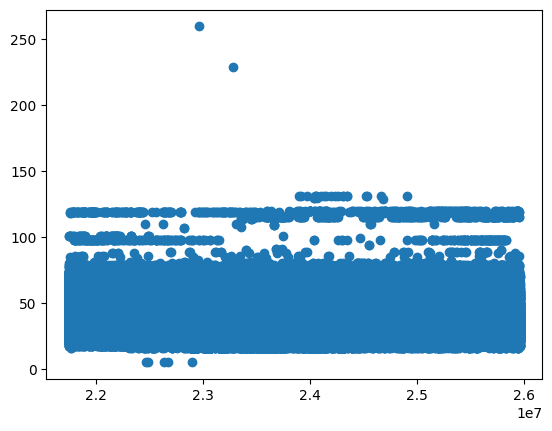

In [39]:
plt.scatter(df['trip_id'],(2019 - df['birthyear']))

In [40]:
df[df["birthyear"] < 1949 ]

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
167,21742619,5782,482.0,339,Emerald Ave & 31st St,403,Wentworth Ave & 33rd St,Subscriber,Female,1947.0,2019-01-01,06:42:13,2019-01-01,06:50:15,January,January
180,21742632,5711,1220.0,72,Wabash Ave & 16th St,133,Kingsbury St & Kinzie St,Subscriber,Male,1946.0,2019-01-01,07:31:18,2019-01-01,07:51:38,January,January
481,21743065,6296,1170.0,442,California Ave & 23rd Pl,442,California Ave & 23rd Pl,Subscriber,Male,1948.0,2019-01-01,12:19:46,2019-01-01,12:39:16,January,January
492,21743093,672,161.0,169,Canal St & Harrison St,414,Canal St & Taylor St,Subscriber,Male,1940.0,2019-01-01,12:29:29,2019-01-01,12:32:10,January,January
586,21743245,5356,1816.0,133,Kingsbury St & Kinzie St,72,Wabash Ave & 16th St,Subscriber,Male,1946.0,2019-01-01,13:23:43,2019-01-01,13:53:59,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816652,25961478,2905,510.0,84,Milwaukee Ave & Grand Ave,91,Clinton St & Washington Blvd,Subscriber,Male,1904.0,2019-12-31,12:35:03,2019-12-31,12:43:34,December,December
3816787,25961619,1736,405.0,194,Wabash Ave & Wacker Pl,195,Columbus Dr & Randolph St,Subscriber,Male,1948.0,2019-12-31,13:23:26,2019-12-31,13:30:11,December,December
3816789,25961621,654,1386.0,133,Kingsbury St & Kinzie St,72,Wabash Ave & 16th St,Subscriber,Male,1946.0,2019-12-31,13:23:38,2019-12-31,13:46:44,December,December
3816813,25961645,6196,108.0,91,Clinton St & Washington Blvd,174,Canal St & Madison St,Subscriber,Male,1942.0,2019-12-31,13:29:53,2019-12-31,13:31:41,December,December


#### Dropping people having age greater than 70

In [41]:
df = df[(df['birthyear'].isnull()) | (df['birthyear'] > 1949)]
df = df[(df['birthyear'].isnull()) | (df['birthyear'] <= 2005)]

In [42]:
df["birthyear"] = df["birthyear"].fillna(np.nan)
df["birthyear"] = pd.to_numeric(df["birthyear"], errors='coerce')

### Mapping Station IDS to Station Names

#### Unique From Stations

In [43]:
from pprint import pprint

# Combine from_station and to_station columns
combined_stations = pd.concat([
    df[['from_station_id', 'from_station_name']].rename(columns={'from_station_id': 'station_id', 'from_station_name': 'station_name'})
])

# Drop duplicates in case a station appears in both from and to columns
combined_stations = combined_stations.drop_duplicates(subset=['station_id', 'station_name'])

# Create dictionary mapping station_id to station_name
from_station_dict = combined_stations.set_index('station_id')['station_name'].to_dict()

# Find duplicate station names
station_name_counts = combined_stations['station_name'].value_counts()
duplicate_stations = station_name_counts[station_name_counts > 1].index.tolist()

# Print the results
print("Station Dictionary:")
pprint(from_station_dict)

print("\nDuplicate Station Names:")
print(duplicate_stations)

print(len(from_station_dict))


Station Dictionary:
{1: 'Special Events',
 2: 'Buckingham Fountain',
 3: 'Shedd Aquarium',
 4: 'Burnham Harbor',
 5: 'State St & Harrison St',
 6: 'Dusable Harbor',
 7: 'Field Blvd & South Water St',
 9: 'Leavitt St & Archer Ave',
 11: 'Jeffery Blvd & 71st St',
 12: 'South Shore Dr & 71st St',
 13: 'Wilton Ave & Diversey Pkwy',
 14: 'Morgan St & 18th St',
 15: 'Racine Ave & 18th St',
 16: 'Paulina Ave & North Ave',
 17: 'Honore St & Division St',
 18: 'Wacker Dr & Washington St',
 19: 'Throop (Loomis) St & Taylor St',
 20: 'Sheffield Ave & Kingsbury St',
 21: 'Aberdeen St & Jackson Blvd',
 22: 'May St & Taylor St',
 23: 'Orleans St & Elm St',
 24: 'Fairbanks Ct & Grand Ave',
 25: 'Michigan Ave & Pearson St',
 26: 'McClurg Ct & Illinois St',
 27: 'Larrabee St & North Ave',
 28: 'Larrabee St & Menomonee St',
 29: 'Noble St & Milwaukee Ave',
 30: 'Ashland Ave & Augusta Blvd',
 31: 'Franklin St & Chicago Ave (Temp)',
 32: 'Racine Ave & Congress Pkwy',
 33: 'State St & Van Buren St',
 34: '

#### Unique To Stations

In [44]:
from pprint import pprint

# Combine from_station and to_station columns
combined_stations = pd.concat([
    df[['to_station_id', 'to_station_name']].rename(columns={'to_station_id': 'station_id', 'to_station_name': 'station_name'})
])

# Drop duplicates in case a station appears in both from and to columns
combined_stations = combined_stations.drop_duplicates(subset=['station_id', 'station_name'])

# Create dictionary mapping station_id to station_name
to_station_dict = combined_stations.set_index('station_id')['station_name'].to_dict()

# Find duplicate station names
station_name_counts = combined_stations['station_name'].value_counts()
duplicate_stations = station_name_counts[station_name_counts > 1].index.tolist()

# Print the results
print("Station Dictionary:")
pprint(to_station_dict)

print("\nDuplicate Station Names:")
print(duplicate_stations)

print(len(to_station_dict))


Station Dictionary:
{1: 'Special Events',
 2: 'Buckingham Fountain',
 3: 'Shedd Aquarium',
 4: 'Burnham Harbor',
 5: 'State St & Harrison St',
 6: 'Dusable Harbor',
 7: 'Field Blvd & South Water St',
 9: 'Leavitt St & Archer Ave',
 11: 'Jeffery Blvd & 71st St',
 12: 'South Shore Dr & 71st St',
 13: 'Wilton Ave & Diversey Pkwy',
 14: 'Morgan St & 18th St',
 15: 'Racine Ave & 18th St',
 16: 'Paulina Ave & North Ave',
 17: 'Honore St & Division St',
 18: 'Wacker Dr & Washington St',
 19: 'Throop (Loomis) St & Taylor St',
 20: 'Sheffield Ave & Kingsbury St',
 21: 'Aberdeen St & Jackson Blvd',
 22: 'May St & Taylor St',
 23: 'Orleans St & Elm St',
 24: 'Fairbanks Ct & Grand Ave',
 25: 'Michigan Ave & Pearson St',
 26: 'McClurg Ct & Illinois St',
 27: 'Larrabee St & North Ave',
 28: 'Larrabee St & Menomonee St',
 29: 'Noble St & Milwaukee Ave',
 30: 'Ashland Ave & Augusta Blvd',
 31: 'Franklin St & Chicago Ave (Temp)',
 32: 'Racine Ave & Congress Pkwy',
 33: 'State St & Van Buren St',
 34: '

#### Common Stations

In [45]:
common_stations = {x:from_station_dict[x] for x in from_station_dict if x in to_station_dict}

In [46]:
pprint(common_stations)
print(len(common_stations))

{1: 'Special Events',
 2: 'Buckingham Fountain',
 3: 'Shedd Aquarium',
 4: 'Burnham Harbor',
 5: 'State St & Harrison St',
 6: 'Dusable Harbor',
 7: 'Field Blvd & South Water St',
 9: 'Leavitt St & Archer Ave',
 11: 'Jeffery Blvd & 71st St',
 12: 'South Shore Dr & 71st St',
 13: 'Wilton Ave & Diversey Pkwy',
 14: 'Morgan St & 18th St',
 15: 'Racine Ave & 18th St',
 16: 'Paulina Ave & North Ave',
 17: 'Honore St & Division St',
 18: 'Wacker Dr & Washington St',
 19: 'Throop (Loomis) St & Taylor St',
 20: 'Sheffield Ave & Kingsbury St',
 21: 'Aberdeen St & Jackson Blvd',
 22: 'May St & Taylor St',
 23: 'Orleans St & Elm St',
 24: 'Fairbanks Ct & Grand Ave',
 25: 'Michigan Ave & Pearson St',
 26: 'McClurg Ct & Illinois St',
 27: 'Larrabee St & North Ave',
 28: 'Larrabee St & Menomonee St',
 29: 'Noble St & Milwaukee Ave',
 30: 'Ashland Ave & Augusta Blvd',
 31: 'Franklin St & Chicago Ave (Temp)',
 32: 'Racine Ave & Congress Pkwy',
 33: 'State St & Van Buren St',
 34: 'Cannon Dr & Fullerto

#### Stations that are unique to From_Stations

In [47]:
uncommon_stations = {x:from_station_dict[x] for x in from_station_dict if x not in to_station_dict}

In [48]:
pprint(uncommon_stations)
print(len(uncommon_stations))

{}
0


#### Stations that are unique to To_Stations

In [49]:
uncommon_stations2 = {x:to_station_dict[x] for x in to_station_dict if x not in from_station_dict}

In [50]:
pprint(uncommon_stations2)
print(len(uncommon_stations2))

{363: 'TS ~ DIVVY PARTS TESTING'}
1


# Exporting the cleaned csv

In [51]:
df.to_csv('cleaned_cyclistic_dataset_2019.csv')

In [52]:
df.head()

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starting_date,starting_time,ending_date,ending_time,start_month,end_month
0,21742443,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,2019-01-01,00:04:37,2019-01-01,00:11:07,January,January
1,21742444,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,2019-01-01,00:08:13,2019-01-01,00:15:34,January,January
2,21742445,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,2019-01-01,00:13:23,2019-01-01,00:27:12,January,January
3,21742446,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,2019-01-01,00:13:45,2019-01-01,00:43:28,January,January
4,21742447,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,2019-01-01,00:14:52,2019-01-01,00:20:56,January,January
